# Renters demographic by age in NYC

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#Import csv file 
df = pd.read_csv('Resources/clean_demographic_data.csv')

df = df.drop(df.index[16:])
indices_to_drop = [1, 2]
df = df.drop(indices_to_drop)

df.head()

,variables,BK72 Williamsburg,BK73 North Side-South Side,BK76 Greenpoint,BK90 East Williamsburg,BK09 Brooklyn Heights-Cobble Hill,BK38 DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BK68 Fort Greene,BK69 Clinton Hill,BK35 Stuyvesant Heights,...,SI24 Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill,SI36 Old Town-Dongan Hills-South Beach,SI45 New Dorp-Midland Beach,SI01 Annadale-Huguenot-Prince's Bay-Eltingville,SI11 Charleston-Richmond Valley-Tottenville,SI25 Oakwood-Oakwood Beach,SI32 Rossville-Woodrow,SI48 Arden Heights,SI54 Great Kills,SI99 park-cemetery-etc-Staten Island
0,Total population,32828.0,46070.0,31522.0,33155.0,23498.0,35373.0,26982.0,36413.0,64331.0,...,31931.0,24999.0,21208.0,28727.0,24083.0,22038.0,19938.0,24799.0,43427.0,0.0
3,Under 5 years,6163.0,3017.0,937.0,1341.0,1538.0,2145.0,1640.0,2191.0,4878.0,...,1482.0,1288.0,1509.0,1303.0,1494.0,1201.0,1019.0,1202.0,2181.0,0.0
4,5 to 9 years,3773.0,2480.0,878.0,913.0,543.0,2038.0,1200.0,1762.0,4337.0,...,1513.0,1235.0,1299.0,1522.0,1965.0,1196.0,1612.0,1406.0,2769.0,0.0
5,10 to 14 years,3620.0,2315.0,914.0,1342.0,547.0,1487.0,1285.0,1290.0,4312.0,...,2031.0,1350.0,1151.0,2146.0,1682.0,1330.0,1370.0,1647.0,2847.0,0.0
6,15 to 19 years,3279.0,2361.0,879.0,1460.0,1109.0,1448.0,1521.0,1911.0,4478.0,...,2220.0,1469.0,1295.0,1898.0,1548.0,1241.0,1007.0,2034.0,2927.0,0.0


In [3]:
#Create a new data frame just with total population and ages by boroughs
def filter_columns(column_name):
    return column_name.startswith("BK")

Brooklyn = []
Brooklyn.append("variables")
        
for column_name in df.columns:
    # Check if the column meets the filtering criteria
    if filter_columns(column_name):
        # If it does, add the column name to the list
        Brooklyn.append(column_name)
        
brooklyn_df = df[Brooklyn]

new_column_names = [column[4:] if idx != 0 else column for idx, column in enumerate(brooklyn_df.columns)]

# Rename columns using the new column names
brooklyn_df.columns = new_column_names

# Display the DataFrame with renamed columns
brooklyn_df.head()

,variables,Williamsburg,North Side-South Side,Greenpoint,East Williamsburg,Brooklyn Heights-Cobble Hill,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,Fort Greene,Clinton Hill,Stuyvesant Heights,...,Madison,Ocean Hill,Brownsville,East New York (Pennsylvania Ave),East Flatbush-Farragut,Erasmus,Rugby-Remsen Village,Georgetown-Marine Park-Bergen Beach-Mill Basin,Canarsie,Flatlands
0,Total population,32828.0,46070.0,31522.0,33155.0,23498.0,35373.0,26982.0,36413.0,64331.0,...,40001.0,31831.0,55412.0,29854.0,52657.0,29933.0,56277.0,48351.0,86160.0,70872.0
3,Under 5 years,6163.0,3017.0,937.0,1341.0,1538.0,2145.0,1640.0,2191.0,4878.0,...,2414.0,2660.0,4920.0,2686.0,3069.0,2105.0,3890.0,3612.0,5005.0,4304.0
4,5 to 9 years,3773.0,2480.0,878.0,913.0,543.0,2038.0,1200.0,1762.0,4337.0,...,2448.0,2347.0,4133.0,2553.0,3034.0,2090.0,3048.0,3844.0,5857.0,4380.0
5,10 to 14 years,3620.0,2315.0,914.0,1342.0,547.0,1487.0,1285.0,1290.0,4312.0,...,1977.0,2870.0,4816.0,2678.0,3207.0,1879.0,3435.0,2896.0,5678.0,4885.0
6,15 to 19 years,3279.0,2361.0,879.0,1460.0,1109.0,1448.0,1521.0,1911.0,4478.0,...,2544.0,2477.0,4976.0,2928.0,3525.0,2303.0,3757.0,3071.0,7308.0,5289.0


In [4]:
transposed_brooklyn_df = brooklyn_df.transpose()
transposed_brooklyn_df.columns = transposed_brooklyn_df.iloc[0]
transposed_brooklyn_df = transposed_brooklyn_df.drop('Total population', axis=1)
transposed_brooklyn_df = transposed_brooklyn_df.drop('variables', axis=0)
transposed_brooklyn_df.head()

variables,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over
Williamsburg,6163.0,3773.0,3620.0,3279.0,3064.0,3960.0,2416.0,2161.0,1306.0,987.0,796.0,770.0,533.0
North Side-South Side,3017.0,2480.0,2315.0,2361.0,4123.0,13445.0,7162.0,4860.0,1684.0,1405.0,1683.0,1014.0,521.0
Greenpoint,937.0,878.0,914.0,879.0,2653.0,10463.0,4465.0,4068.0,2045.0,1519.0,1314.0,986.0,401.0
East Williamsburg,1341.0,913.0,1342.0,1460.0,3038.0,9522.0,4605.0,3482.0,1575.0,1450.0,2128.0,1741.0,558.0
Brooklyn Heights-Cobble Hill,1538.0,543.0,547.0,1109.0,1464.0,5809.0,4242.0,2564.0,1446.0,1355.0,1610.0,854.0,417.0


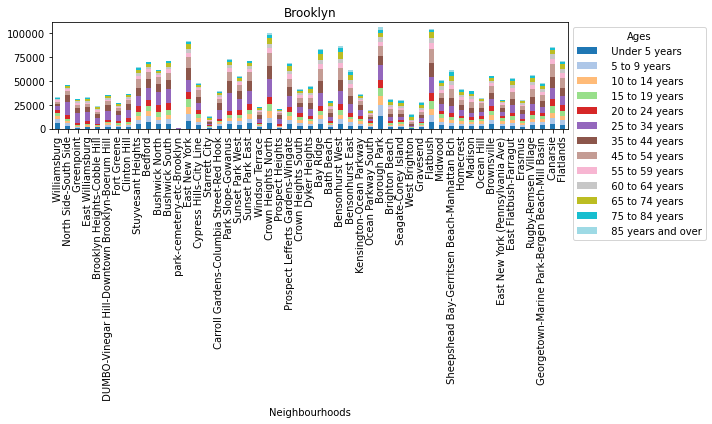

In [5]:
transposed_brooklyn_df.plot(kind='bar', stacked=True, figsize=(10, 6),colormap='tab20')
plt.title('Brooklyn')
plt.xlabel('Neighbourhoods')
plt.xticks(rotation=90)
plt.legend(title='Ages',bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.savefig('stacked_bar_chart_brooklyn.png')
plt.show()

In [6]:
def filter_columns(column_name):
    return column_name.startswith("BX")

Bronx = []
Bronx.append("variables")
        
for column_name in df.columns:
    # Check if the column meets the filtering criteria
    if filter_columns(column_name):
        # If it does, add the column name to the list
        Bronx.append(column_name)
        
bronx_df = df[Bronx]

new_column_names = [column[4:] if idx != 0 else column for idx, column in enumerate(bronx_df.columns)]

# Rename columns using the new column names
bronx_df.columns = new_column_names

# Display the DataFrame with renamed columns
bronx_df.head()

,variables,Hunts Point,Longwood,Melrose South-Mott Haven North,Mott Haven-Port Morris,Rikers Island1,Claremont-Bathgate,Belmont,East Tremont,Morrisania-Melrose,...,Co-op City,Schuylerville-Throgs Neck-Edgewater Park,Bronxdale,Allerton-Pelham Gardens,Van Nest-Morris Park-Westchester Square,Pelham Parkway,Eastchester-Edenwald-Baychester,Williamsbridge-Olinville,Woodlawn-Wakefield,park-cemetery-etc-Bronx
0,Total population,27562.0,25542.0,39020.0,52132.0,9741.0,30715.0,25783.0,41871.0,37872.0,...,44304.0,46104.0,33728.0,33404.0,30098.0,30191.0,36676.0,61503.0,45805.0,1377.0
3,Under 5 years,2377.0,2321.0,3527.0,4645.0,0.0,2605.0,2145.0,3541.0,3045.0,...,1769.0,2308.0,2123.0,1758.0,2359.0,2237.0,2295.0,4965.0,3130.0,136.0
4,5 to 9 years,2076.0,2298.0,4167.0,4210.0,0.0,2769.0,2206.0,3477.0,2940.0,...,2185.0,2893.0,2090.0,1987.0,1966.0,1597.0,2650.0,4057.0,2530.0,123.0
5,10 to 14 years,2863.0,2422.0,3425.0,3835.0,0.0,2396.0,1675.0,3500.0,3201.0,...,2491.0,3059.0,1975.0,2534.0,2181.0,1571.0,2814.0,4894.0,2973.0,76.0
6,15 to 19 years,2222.0,2363.0,2800.0,4930.0,1475.0,3303.0,3139.0,4179.0,3738.0,...,2729.0,3213.0,2466.0,2239.0,1996.0,1483.0,3788.0,4869.0,3207.0,101.0


In [7]:
transposed_bronx_df = bronx_df.transpose()
transposed_bronx_df.columns = transposed_bronx_df.iloc[0]
transposed_bronx_df = transposed_bronx_df.drop('Total population', axis=1)
transposed_bronx_df = transposed_bronx_df.drop('variables', axis=0)
transposed_bronx_df.head()

variables,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over
Hunts Point,2377.0,2076.0,2863.0,2222.0,2505.0,4746.0,3557.0,2975.0,1029.0,939.0,1436.0,649.0,188.0
Longwood,2321.0,2298.0,2422.0,2363.0,1988.0,3964.0,3082.0,3097.0,1007.0,803.0,1348.0,664.0,185.0
Melrose South-Mott Haven North,3527.0,4167.0,3425.0,2800.0,3754.0,6486.0,4218.0,4282.0,1461.0,1621.0,1764.0,1192.0,323.0
Mott Haven-Port Morris,4645.0,4210.0,3835.0,4930.0,4731.0,7543.0,7224.0,6359.0,2103.0,1854.0,2741.0,1596.0,361.0
Rikers Island1,0.0,0.0,0.0,1475.0,2051.0,2668.0,1887.0,1281.0,227.0,96.0,44.0,12.0,0.0


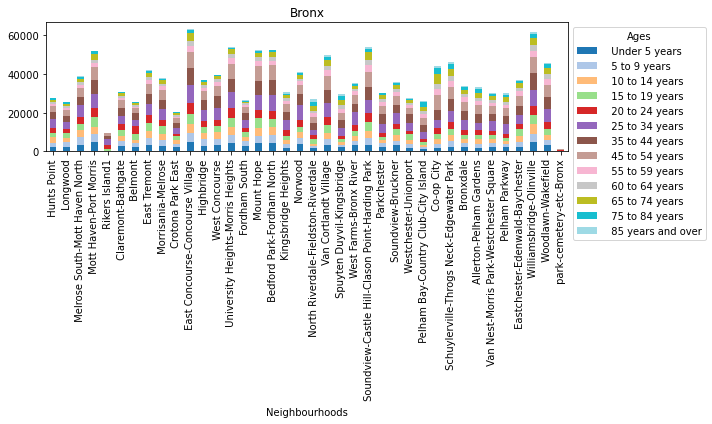

In [8]:
transposed_bronx_df.plot(kind='bar', stacked=True, figsize=(10, 6),colormap='tab20')
plt.title('Bronx')
plt.xlabel('Neighbourhoods')
plt.xticks(rotation=90)
plt.legend(title='Ages',bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.savefig('stacked_bar_chart_bronx.png')
plt.show()

In [9]:
def filter_columns(column_name):
    return column_name.startswith("MN")

Manhathan = []
Manhathan.append("variables")
        
for column_name in df.columns:
    # Check if the column meets the filtering criteria
    if filter_columns(column_name):
        # If it does, add the column name to the list
        Manhathan.append(column_name)
        
Manhathan_df = df[Manhathan]

new_column_names = [column[4:] if idx != 0 else column for idx, column in enumerate(Manhathan_df.columns)]

# Rename columns using the new column names
Manhathan_df.columns = new_column_names

Manhathan_df.head()

,variables,West Village,SoHo-TriBeCa-Civic Center-Little Italy,Battery Park City-Lower Manhattan,East Village,Chinatown,Lower East Side,Hudson Yards-Chelsea-Flat Iron-Union Square,Clinton,Midtown-Midtown South,...,Manhattanville,Morningside Heights,Central Harlem North-Polo Grounds,Central Harlem South,East Harlem South,East Harlem North,Marble Hill2-Inwood,Washington Heights North,Washington Heights South,park-cemetery-etc-Manhattan
0,Total population,67185.0,40059.0,37506.0,43755.0,46550.0,74243.0,69299.0,42931.0,28228.0,...,23845.0,54326.0,78193.0,46694.0,59794.0,60465.0,50358.0,71085.0,89551.0,1483.0
3,Under 5 years,2200.0,2096.0,2430.0,892.0,1618.0,3205.0,2758.0,1163.0,888.0,...,1320.0,1815.0,4467.0,3477.0,3432.0,4231.0,3203.0,3761.0,4794.0,0.0
4,5 to 9 years,1775.0,1332.0,1402.0,739.0,1933.0,2898.0,1903.0,708.0,344.0,...,1336.0,1424.0,4553.0,2583.0,2704.0,3780.0,2730.0,3034.0,4400.0,0.0
5,10 to 14 years,1267.0,1266.0,692.0,607.0,1884.0,3369.0,1140.0,590.0,335.0,...,1524.0,1476.0,4731.0,2597.0,3398.0,4588.0,3282.0,3793.0,3964.0,3.0
6,15 to 19 years,3534.0,1227.0,1165.0,3751.0,2010.0,4325.0,1994.0,934.0,1326.0,...,1717.0,6442.0,5742.0,2684.0,4465.0,4914.0,3036.0,4716.0,5546.0,8.0


In [10]:
transposed_manhathan_df = Manhathan_df.transpose()
transposed_manhathan_df.columns = transposed_manhathan_df.iloc[0]
transposed_manhathan_df = transposed_manhathan_df.drop('Total population', axis=1)
transposed_manhathan_df = transposed_manhathan_df.drop('variables', axis=0)
transposed_manhathan_df.head()

variables,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over
West Village,2200.0,1775.0,1267.0,3534.0,4984.0,18428.0,10167.0,7752.0,3859.0,4291.0,5178.0,2883.0,867.0
SoHo-TriBeCa-Civic Center-Little Italy,2096.0,1332.0,1266.0,1227.0,4130.0,10505.0,6104.0,4109.0,2343.0,2501.0,2604.0,1242.0,600.0
Battery Park City-Lower Manhattan,2430.0,1402.0,692.0,1165.0,3989.0,11947.0,6710.0,4229.0,1172.0,1400.0,1057.0,832.0,481.0
East Village,892.0,739.0,607.0,3751.0,5723.0,12686.0,6280.0,5097.0,2250.0,1579.0,2228.0,1280.0,643.0
Chinatown,1618.0,1933.0,1884.0,2010.0,4109.0,8947.0,7403.0,6158.0,2186.0,3109.0,3472.0,2488.0,1233.0


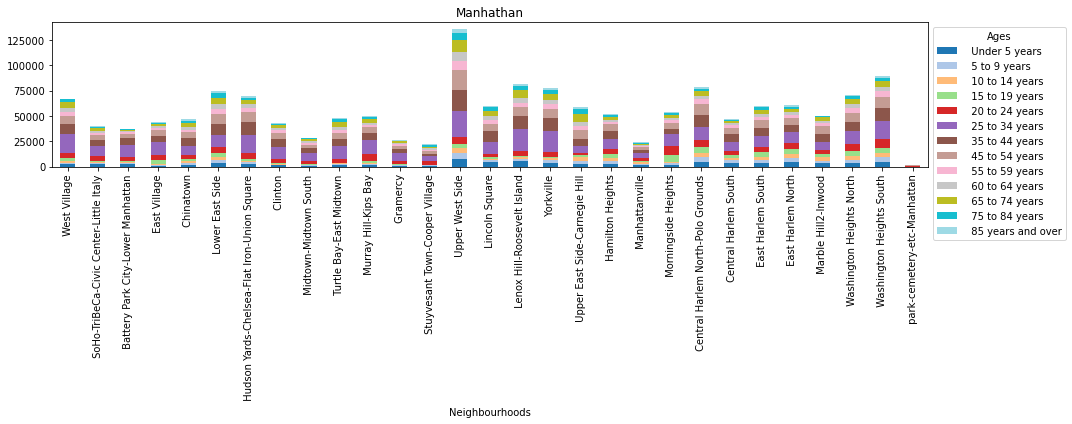

In [20]:
transposed_manhathan_df.plot(kind='bar', stacked=True, figsize=(15, 6),colormap='tab20')
plt.title('Manhathan')
plt.xlabel('Neighbourhoods')
plt.xticks(rotation=90)
plt.legend(title='Ages',bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.savefig('stacked_bar_chart_manhathan.png')
plt.show()

In [12]:
def filter_columns(column_name):
    return column_name.startswith("QN")

Queens = []
Queens.append("variables")
        
for column_name in df.columns:
    # Check if the column meets the filtering criteria
    if filter_columns(column_name):
        # If it does, add the column name to the list
        Queens.append(column_name)
        
Queens_df = df[Queens]

new_column_names = [column[4:] if idx != 0 else column for idx, column in enumerate(Queens_df.columns)]

# Rename columns using the new column names
Queens_df.columns = new_column_names

Queens_df.head()

,variables,Queensbridge-Ravenswood-Long Island City,Astoria,Old Astoria,Steinway,park-cemetery-etc-Queens,Hunters Point-Sunnyside-West Maspeth,Elmhurst-Maspeth,Woodside,North Corona,...,Springfield Gardens South-Brookville,Rosedale,Cambria Heights,Queens Village,Bellerose,Glen Oaks-Floral Park-New Hyde Park,Laurelton,Breezy Point-Belle Harbor-Rockaway Park-Broad Channel,Hammels-Arverne-Edgemere,Far Rockaway-Bayswater
0,Total population,18539.0,75149.0,26470.0,49001.0,438.0,60575.0,25088.0,45259.0,50295.0,...,19901.0,28201.0,20212.0,57549.0,25964.0,22427.0,25141.0,29543.0,35500.0,50294.0
3,Under 5 years,1128.0,2968.0,1492.0,2244.0,24.0,3345.0,1267.0,2417.0,4500.0,...,1313.0,2087.0,896.0,2974.0,1606.0,1004.0,1124.0,1535.0,2756.0,4966.0
4,5 to 9 years,1313.0,2710.0,959.0,1795.0,19.0,2385.0,1304.0,2307.0,3489.0,...,1394.0,2098.0,815.0,3078.0,1450.0,940.0,1519.0,1954.0,2650.0,3648.0
5,10 to 14 years,1464.0,2776.0,1075.0,1932.0,18.0,2112.0,1092.0,2238.0,2610.0,...,1548.0,2056.0,891.0,3458.0,1608.0,1108.0,1724.0,1867.0,2989.0,3789.0
6,15 to 19 years,1324.0,3052.0,1526.0,2004.0,28.0,2369.0,1263.0,2164.0,2824.0,...,1175.0,2282.0,1599.0,4374.0,1819.0,974.0,1866.0,1651.0,3056.0,3573.0


In [13]:
transposed_Queens_df = Queens_df.transpose()
transposed_Queens_df.columns = transposed_Queens_df.iloc[0]
transposed_Queens_df = transposed_Queens_df.drop('Total population', axis=1)
transposed_Queens_df = transposed_Queens_df.drop('variables', axis=0)
transposed_Queens_df.head()

variables,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over
Queensbridge-Ravenswood-Long Island City,1128.0,1313.0,1464.0,1324.0,1681.0,2897.0,2777.0,2477.0,1026.0,835.0,960.0,498.0,159.0
Astoria,2968.0,2710.0,2776.0,3052.0,6372.0,19363.0,11800.0,9419.0,3756.0,3168.0,5191.0,3330.0,1244.0
Old Astoria,1492.0,959.0,1075.0,1526.0,2622.0,6588.0,4242.0,3227.0,1239.0,822.0,1439.0,1004.0,235.0
Steinway,2244.0,1795.0,1932.0,2004.0,3733.0,12344.0,7178.0,6166.0,2634.0,2536.0,3272.0,2280.0,883.0
park-cemetery-etc-Queens,24.0,19.0,18.0,28.0,26.0,47.0,20.0,89.0,27.0,17.0,22.0,48.0,53.0


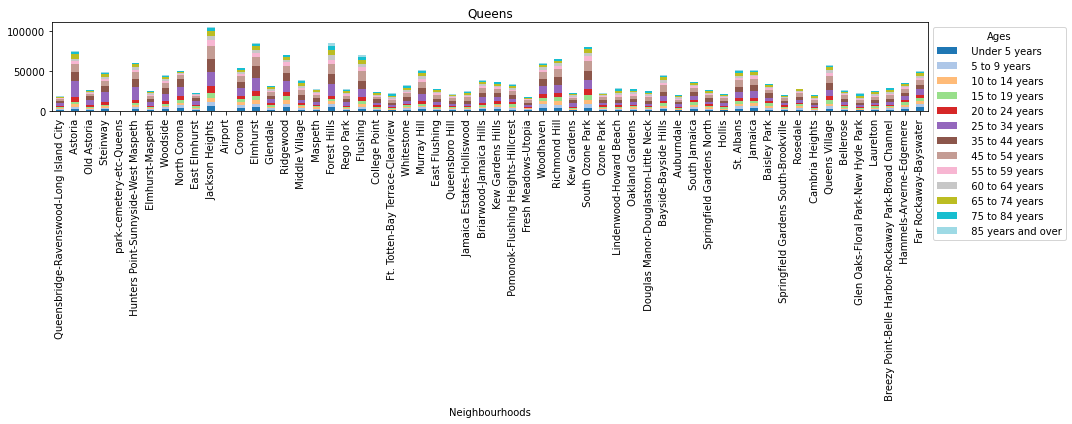

In [21]:
transposed_Queens_df.plot(kind='bar', stacked=True, figsize=(15, 6),colormap='tab20')
plt.title('Queens')
plt.xlabel('Neighbourhoods')
plt.xticks(rotation=90)
plt.legend(title='Ages',bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.savefig('stacked_bar_chart_queens.png')
plt.show()

In [15]:
def filter_columns(column_name):
    return column_name.startswith("SI")

Staten_island = []
Staten_island.append("variables")
        
for column_name in df.columns:
    # Check if the column meets the filtering criteria
    if filter_columns(column_name):
        # If it does, add the column name to the list
        Staten_island.append(column_name)
        
Staten_island_df = df[Staten_island]

new_column_names = [column[4:] if idx != 0 else column for idx, column in enumerate(Staten_island_df.columns)]

# Rename columns using the new column names
Staten_island_df.columns = new_column_names

Staten_island_df.head()

,variables,Westerleigh,Grymes Hill-Clifton-Fox Hills,Mariner's Harbor-Arlington-Port Ivory-Graniteville,West New Brighton-New Brighton-St. George,Port Richmond,New Brighton-Silver Lake,Stapleton-Rosebank,New Springville-Bloomfield-Travis,Grasmere-Arrochar-Ft. Wadsworth,Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill,Old Town-Dongan Hills-South Beach,New Dorp-Midland Beach,Annadale-Huguenot-Prince's Bay-Eltingville,Charleston-Richmond Valley-Tottenville,Oakwood-Oakwood Beach,Rossville-Woodrow,Arden Heights,Great Kills,park-cemetery-etc-Staten Island
0,Total population,24202.0,23858.0,30473.0,31214.0,19240.0,18310.0,25635.0,39517.0,14775.0,31931.0,24999.0,21208.0,28727.0,24083.0,22038.0,19938.0,24799.0,43427.0,0.0
3,Under 5 years,1450.0,1838.0,2230.0,2577.0,1774.0,1127.0,1379.0,2308.0,909.0,1482.0,1288.0,1509.0,1303.0,1494.0,1201.0,1019.0,1202.0,2181.0,0.0
4,5 to 9 years,1201.0,1887.0,1919.0,2319.0,1431.0,1253.0,1696.0,2048.0,977.0,1513.0,1235.0,1299.0,1522.0,1965.0,1196.0,1612.0,1406.0,2769.0,0.0
5,10 to 14 years,1681.0,1533.0,2564.0,2063.0,1159.0,1289.0,1482.0,2848.0,887.0,2031.0,1350.0,1151.0,2146.0,1682.0,1330.0,1370.0,1647.0,2847.0,0.0
6,15 to 19 years,1449.0,2453.0,2703.0,2581.0,1260.0,1279.0,1825.0,2433.0,711.0,2220.0,1469.0,1295.0,1898.0,1548.0,1241.0,1007.0,2034.0,2927.0,0.0


In [16]:
transposed_Staten_island_df = Staten_island_df.transpose()
transposed_Staten_island_df.columns = transposed_Staten_island_df.iloc[0]
transposed_Staten_island_df = transposed_Staten_island_df.drop('Total population', axis=1)
transposed_Staten_island_df = transposed_Staten_island_df.drop('variables', axis=0)
transposed_Staten_island_df.head()

variables,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over
Westerleigh,1450.0,1201.0,1681.0,1449.0,1340.0,2472.0,3876.0,3893.0,1634.0,1472.0,1831.0,1267.0,636.0
Grymes Hill-Clifton-Fox Hills,1838.0,1887.0,1533.0,2453.0,2498.0,3731.0,2805.0,3107.0,959.0,1145.0,960.0,599.0,343.0
Mariner's Harbor-Arlington-Port Ivory-Graniteville,2230.0,1919.0,2564.0,2703.0,2585.0,4475.0,4378.0,4378.0,1537.0,1302.0,1363.0,783.0,256.0
West New Brighton-New Brighton-St. George,2577.0,2319.0,2063.0,2581.0,2103.0,4530.0,4170.0,4445.0,1538.0,1606.0,1903.0,982.0,397.0
Port Richmond,1774.0,1431.0,1159.0,1260.0,1328.0,3137.0,2577.0,2475.0,1098.0,1024.0,750.0,841.0,386.0


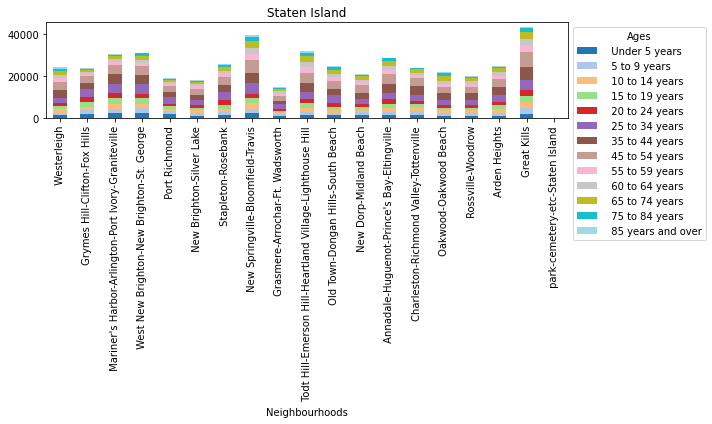

In [17]:
transposed_Staten_island_df.plot(kind='bar', stacked=True, figsize=(10, 6),colormap='tab20')
plt.title('Staten Island')
plt.xlabel('Neighbourhoods')
plt.xticks(rotation=90)
plt.legend(title='Ages',bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.savefig('stacked_bar_chart_staten_island.png')
plt.show()